# Практическая работа № 4. 

## "Гистограмма как оценка плотости"

### Цель работы:

- ознакомиться с определением гистрограммы и ее поведением при фиксированном значении аргумента
- научиться находить значения гистограммы, строить ее график одновременно(в качестве тестового задания) с реальной плотностью генеральной совокупности
- убедиться в том, что асимптотические методы работают при конечном объеме выборки при корректном (с дополнительными требованиями) их использовании


### Задание и ход работы

Для случайной величины, распределенной по нормальному закону с параметрами $(a, \sigma^2)$, выполнить следующие действия:

- Задать параметры распределения $X$ ~ $N(a, \sigma^2)$
- Построить график $f_X(x)$
- При $n = 10^6$ построить выборку из генеральной совокупности $X$
- По построенной выборке вычислить значения и построить график гистограммы, используя при построении встроенную функцию для построения кусочно-постоянной функции
- Совместить графики плотности и гистограммы на одном рисунке
-  На основе хи-квадрат критерия Пирсона провести проверку гипотез согласия с семейством распределения генеральной совокупности
- Оценить ошибки I и II рода критерия

Сравнить с аналогичной обработкой выборки из равномерного распределения.

In [7]:
pkg load statistics
graphics_toolkit('gnuplot');

In [2]:
% globals
global left = -10;
global right = 10;
global step = 0.01;
global n = 10^6;
global m = 100;
global figure_number = 1;

In [3]:
% ud
mu = 0;
sigma = 3;

% nd
a = -3;
b = 9;

In [4]:
function draw(a, b, pdf, rnd, plot_name)
    global left step right n m figure_number
    x = [left : step : right];
    y = pdf(x, a, b);
    X = sort(rnd(a, b, 1, n));
    h = (X(end) - X(1)) / m;
    y_hist = hist(X, m) / n / h;
    x_hist = [X(1) : h : X(end) - h];
    [x_hist, y_hist] = stairs(x_hist, y_hist);
    f = figure(figure_number++, "position", get(0, "screensize"));
    plot(x, y, x_hist, y_hist)
    title(plot_name);
    pause(0.01);
end

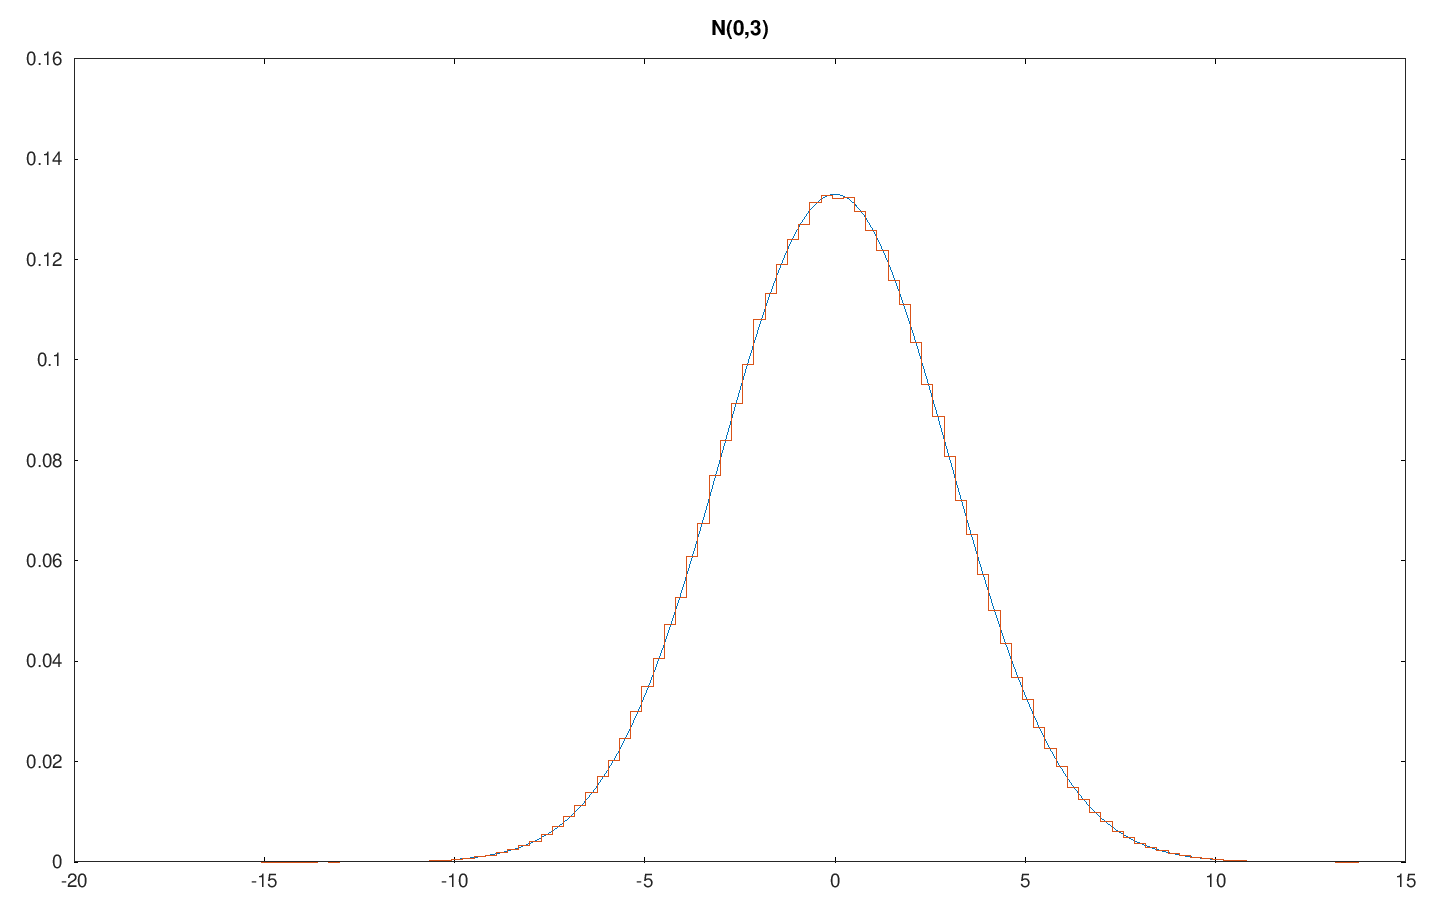

In [5]:
nd_title = strcat("N(", num2str(mu), ", ", num2str(sigma), ")");
draw(mu, sigma, @normpdf, @normrnd, nd_title);

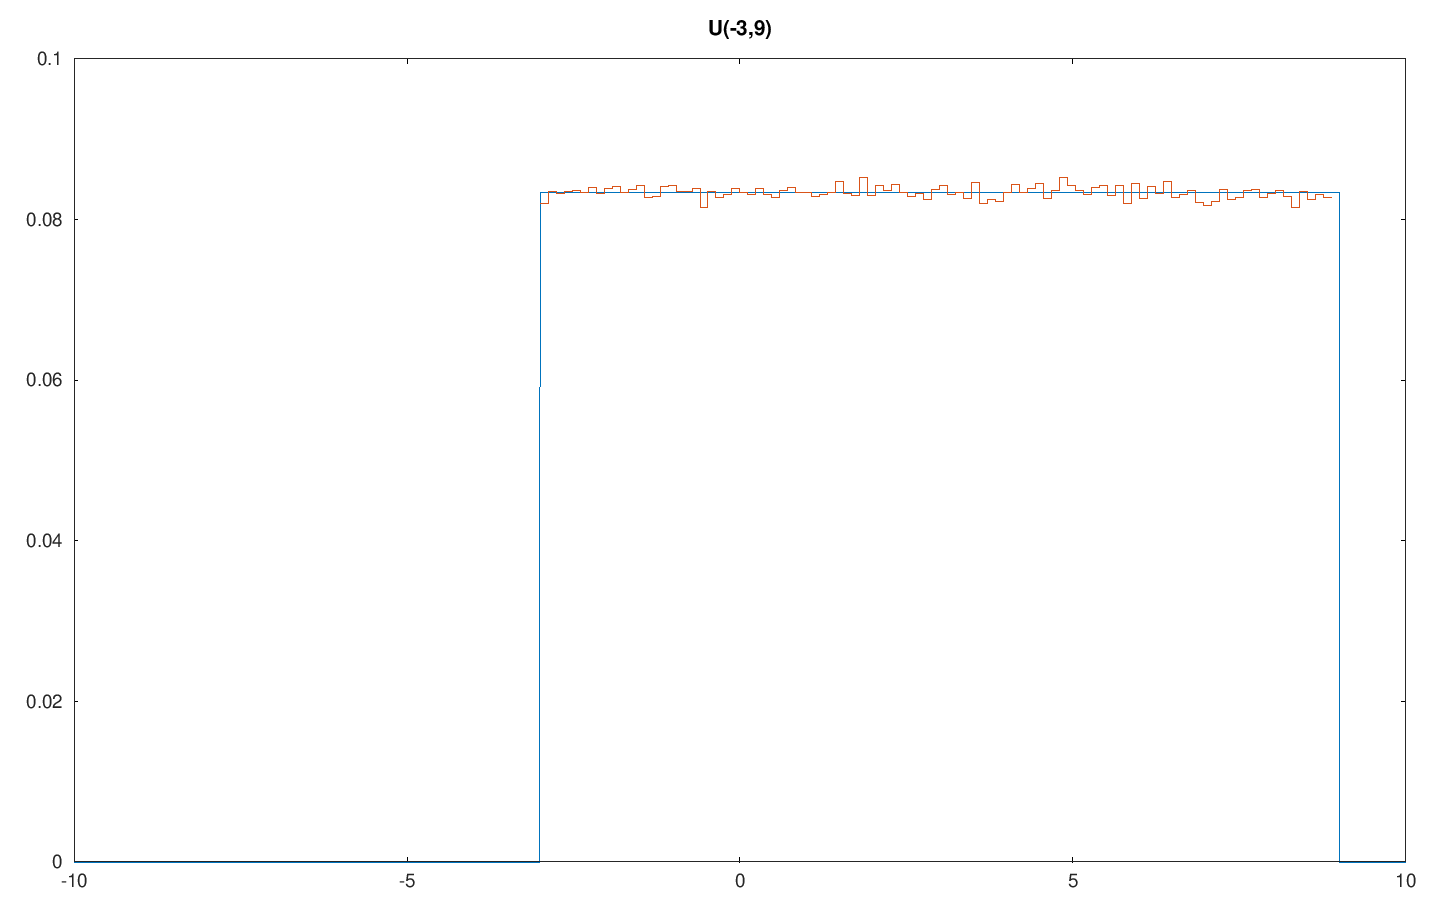

In [6]:
ud_title = strcat("U(", num2str(a), ", ", num2str(b), ")");
draw(a, b, @unifpdf, @unifrnd, ud_title);